In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


#Badlands
import morphoGrid as morph
# from scripts import morphoGrid_sl as morph_sl
import morphoGrid_noflex as morphnf# from scripts import morphoGrid_sl as morph_sl




In [198]:
#loading simulations
sim=['/live/share/Badlands_simulations/Delta_2020/Delta_running/Synthetic/Delta_SL0_Te50/h5',
    '/live/share/Badlands_simulations/Delta_2020/Delta_running/IH_GH/Delta_SL_GH_Te50/h5',
     '/live/share/Badlands_simulations/Delta_2020/Delta_running/IH_GH/Delta_SL_IH_Te50/h5']


In [199]:
GOM=pd.read_csv ('./Frederick_EPSL_Dip_Data.csv',sep=',', header=0)
GOM.columns

subsidence_rates=pd.read_csv ('./subsidence_rates_faults_sadler.csv',sep=',', header=0)
# subsidence_rates

In [200]:
seqs=[GOM.Seq_2_Top_m, GOM.Seq_3_Top_m, GOM.Seq_4_Top_m, GOM.Seq_5_Top_m, GOM.Seq_6_Top_m, GOM.Seq_7_Top_m, GOM.Seq_8_Top_m]

seqs_rates=[GOM.Seq_2_rate_mm_yr, GOM.Seq_3_rate_mm_yr, GOM.Seq_4_rate_mm_yr, GOM.Seq_5_rate_mm_yr, GOM.Seq_6_rate_mm_yr, GOM.Seq_7_rate_mm_yr, GOM.Seq_8_rate_mm_yr]

seq_duration=[0.58, 1.02, 1.22, 1.63, 1.93, 2.39, 3.13]

nfile=119

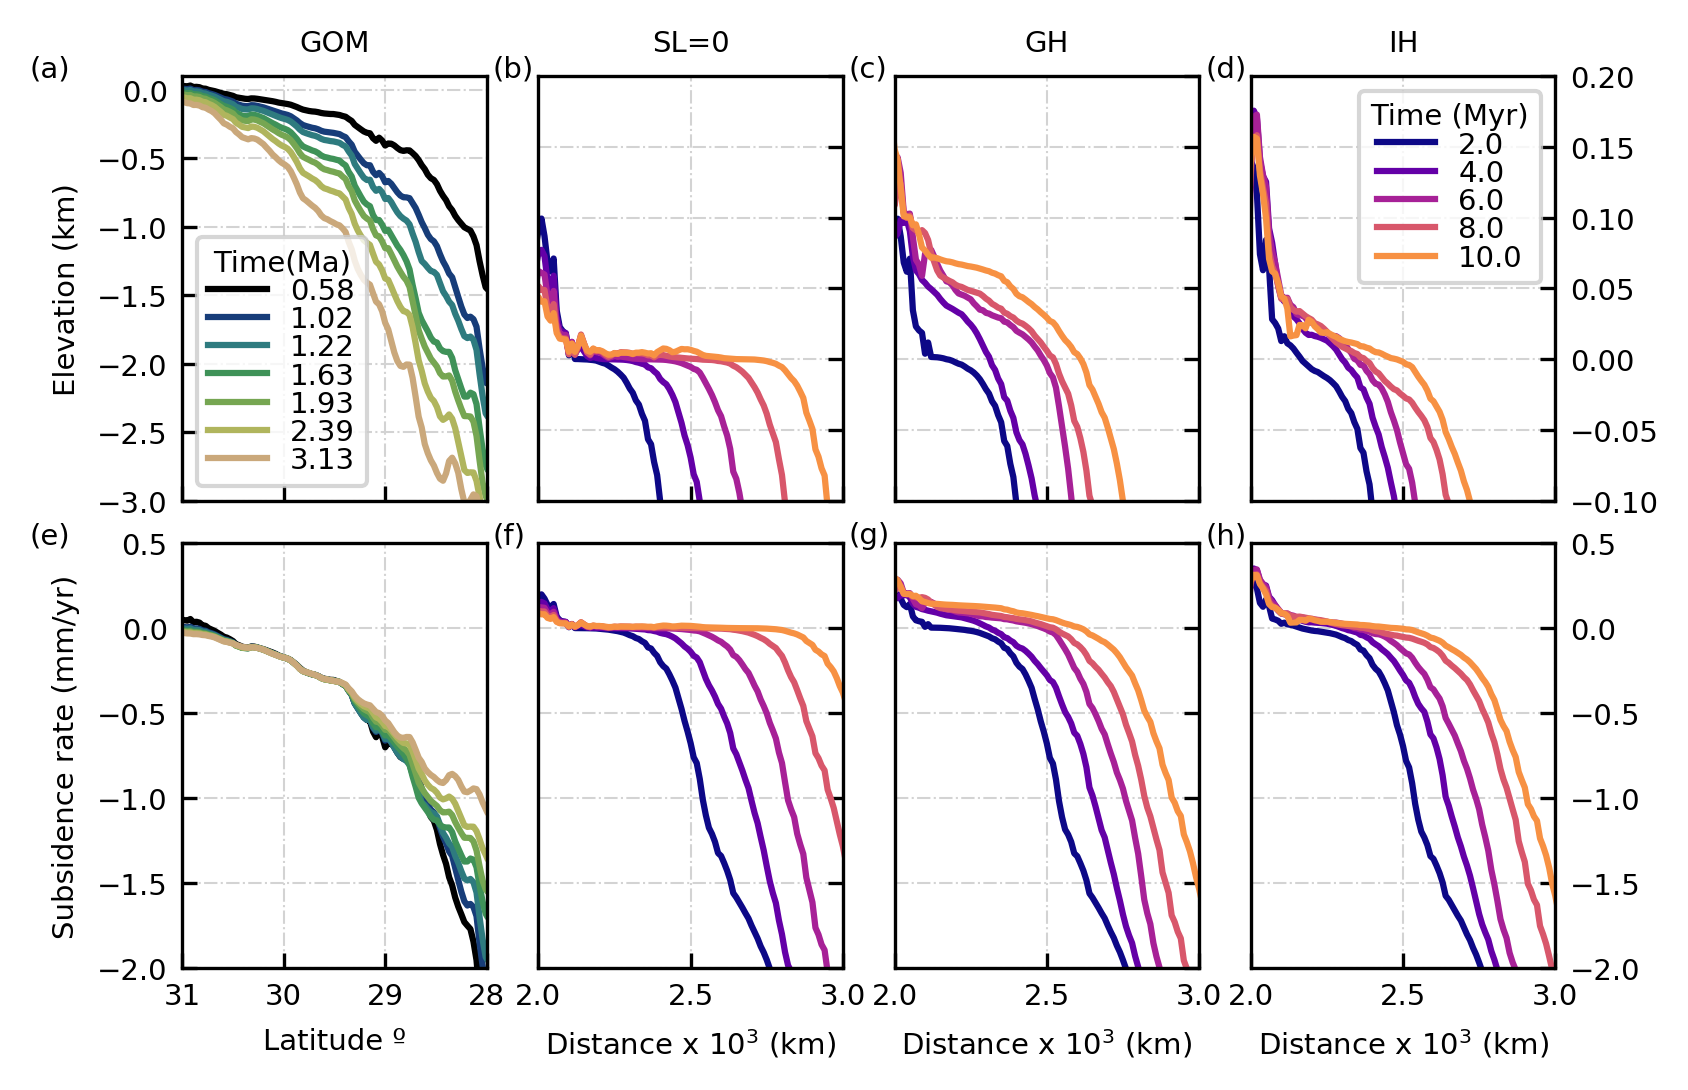

In [201]:
nrows=2; ncols=4
fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=((15/2.54), (10/2.54)), dpi=300)
plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42; plt.rc("font", size=7)

########
#Models#
########
# colormap = plt.cm.gist_earth_r
# color=[colormap(i) for i in np.linspace(0, 1, nfile-10)]
# c = np.linspace(0, 1, nfile-10)
# norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
# cmap = mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma_r)
# cmap.set_array([])
# color=[plt.cm.plasma_r(i) for i in np.linspace(0, 1.5, 12)]

colormap = plt.cm.plasma
color=[colormap(i) for i in np.linspace(0, 1, nfile-10)]

c = np.linspace(0, 1, nfile-10)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma)
cmap.set_array([])

column_title=['GOM', 'SL=0','GH', 'IH']

ub=150 #Upstream boundary
db=350 #Downstream boundary
xs_i=100#index at which the cross-section is plotted
initial_step=19
final_step=119

for i in np.arange(0,3,1):                 
    for step in np.arange(20,nfile,20):
        morpho = morph.morphoGrid(sim[i],dx=1e4)
        morpho.loadHDF5(timestep=step)
#         axes.flatten()[i].plot(morpho.x[xs_i,ub:db]/1e6, morpho.flexure[xs_i,ub:db], color=color[step-20])  
        axes.flatten()[i+1].plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db]/1e3, color=color[step-20], label=step/10)  
        axes.flatten()[i+ncols+1].plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db]/500, color=color[step-20], label=final_step-step)        
axes.flatten()[3].legend(labelspacing = 0.01, title='Time (Myr)') 

#####
#GOM#
#####
color=[plt.cm.gist_earth(i) for i in np.linspace(0, 1.5, 12)]

for i in np.arange(0,len(seqs),1):
    axes.T.flatten()[0].plot(GOM.Lat, seqs[i]/1e3, color=color[i], label= str(seq_duration[i]))

for i in np.arange(0,len(seqs),1):
    axes.T.flatten()[1].plot(GOM.Lat, seqs[i]/(seq_duration[i]*1e3), color=color[i], label= str(seq_duration[i]))
axes.T.flatten()[0].legend(labelspacing = 0.01, title='Time(Ma)' , fontsize=7)      


        
############
#Formatting# 
############
abc=['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)']
xabc=[32.5,1.85,1.85,1.85]
yabc=[0.1, 0.2,0.2,0.2]

for i in np.arange(0,nrows*ncols,1):
    axes.T.flatten()[i].grid(color='lightgrey', linestyle='-.', linewidth=0.5)
    axes.T.flatten()[i].tick_params(direction= 'in')
    if i==0:
        axes.T.flatten()[i].set_ylabel('Elevation (km)')
        axes.T.flatten()[i].set_xlim(31,28)
        axes.T.flatten()[i].set_ylim(-3,0.1)
    if i==1:
        axes.T.flatten()[i].set_xlabel('Latitude º')
        axes.T.flatten()[i].set_ylabel('Subsidence rate (mm/yr)')
        axes.T.flatten()[i].set_xlim(31,28)
        axes.T.flatten()[i].set_ylim(-2,0.5)
    if i>=2 and i<=5:
         axes.T.flatten()[i].set_yticklabels([]) 
    if i>=5 and i<=7:
        axes.flatten()[i].set_xlabel('Distance x $10^3$ (km)')
    if i>=2 and i<=7:
        axes.T.flatten()[i].yaxis.tick_right()
        axes.T.flatten()[i].set_xlim(2,3)
    if i>=1 and i<=3:
        axes.flatten()[i].set_ylim(-0.1,0.2)
    # First row
    if i<ncols:
        axes.flatten()[i].set_title(column_title[i], fontsize=7)
        axes.flatten()[i].set_xticklabels([]) 
        axes.flatten()[i].text(xabc[i], yabc[i], abc[i])

    #second row
    if i>=ncols:
        axes.flatten()[i].set_ylim(0.5, -2)
        axes.flatten()[i].invert_yaxis()
        axes.flatten()[i].text(xabc[i-ncols], 0.5, abc[i])


plt.subplots_adjust(hspace=0.1, wspace=0.17)
# plt.tight_layout()

# fig.savefig('./images/GOM&simulations.pdf')


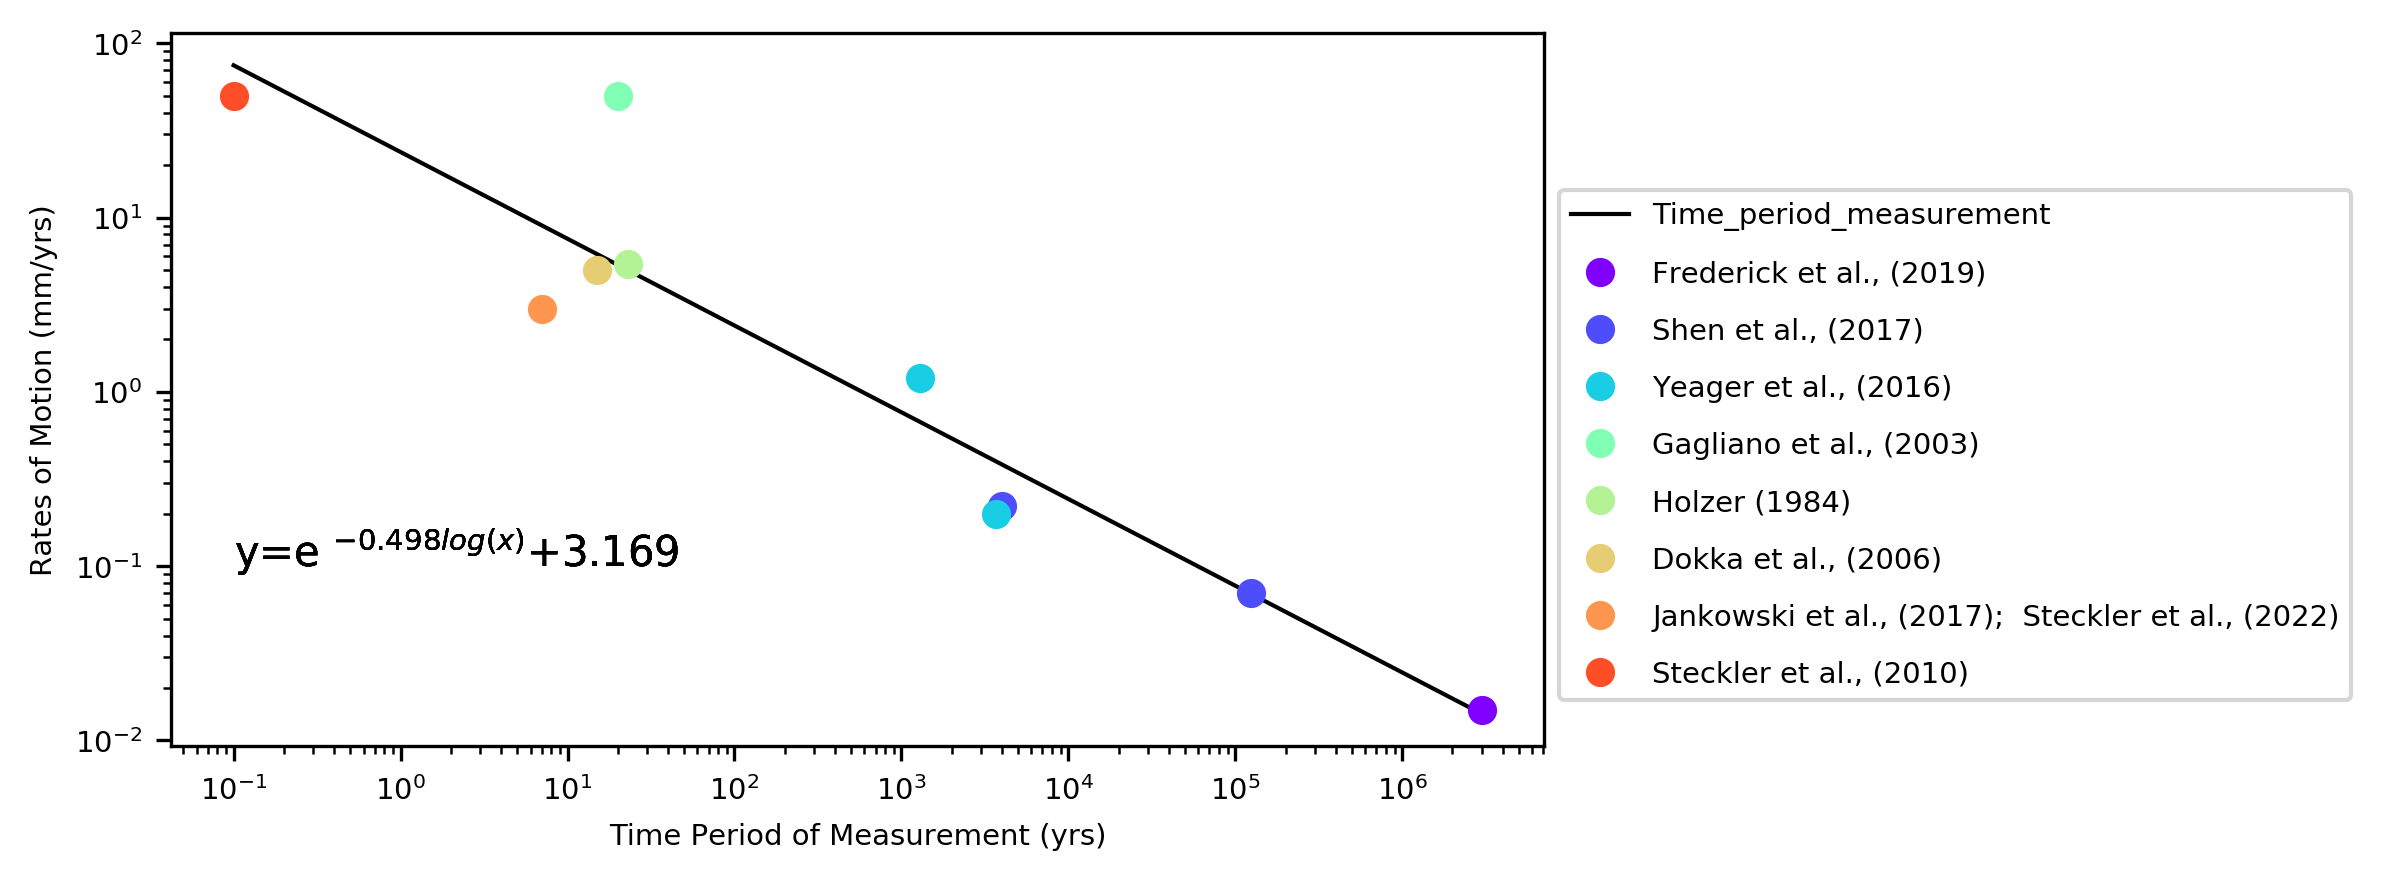

In [202]:
#Rates plot
fig = plt.figure(figsize=((15/2.54), (8/2.54)), dpi=300)
plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42; plt.rc("font", size=7)

x=subsidence_rates.Time_period_measurement
y=subsidence_rates.rates_mm_yr
m, c = np.polyfit(np.log(x), np.log(y), deg=1)

y_fit= np.exp(m*np.log(x) + c) # calculate the fitted values of y 

plt.plot(x, y_fit, color='k', linewidth=1)

colormap = plt.cm.rainbow
color=[colormap(i) for i in np.linspace(0, 1, len(subsidence_rates.Study)+1)]

for i, item in enumerate(subsidence_rates.Study):
    if i==0:
        plt.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=color[i], label=subsidence_rates.Study[i])
    if i==1:
        plt.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=color[i], label=subsidence_rates.Study[i])
    if i==2:
        plt.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=color[1])
    if i==3:
        plt.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=color[i], label=subsidence_rates.Study[i])
    if i==4:
        plt.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=color[3])
    if i>=5:
        plt.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=color[i], label=subsidence_rates.Study[i])

        plt.text(0.1,0.1,'y=e $^{'+str(np.round(m,3)) +' log (x)}$+'+ str(np.round(c,3)), fontsize=10)
plt.xlabel('Time Period of Measurement (yrs)')
plt.ylabel('Rates of Motion (mm/yrs)')
plt.legend(bbox_to_anchor=[1,0.8], labelspacing=1)

# fig.savefig('./images/Fig_rates_compilation.pdf')


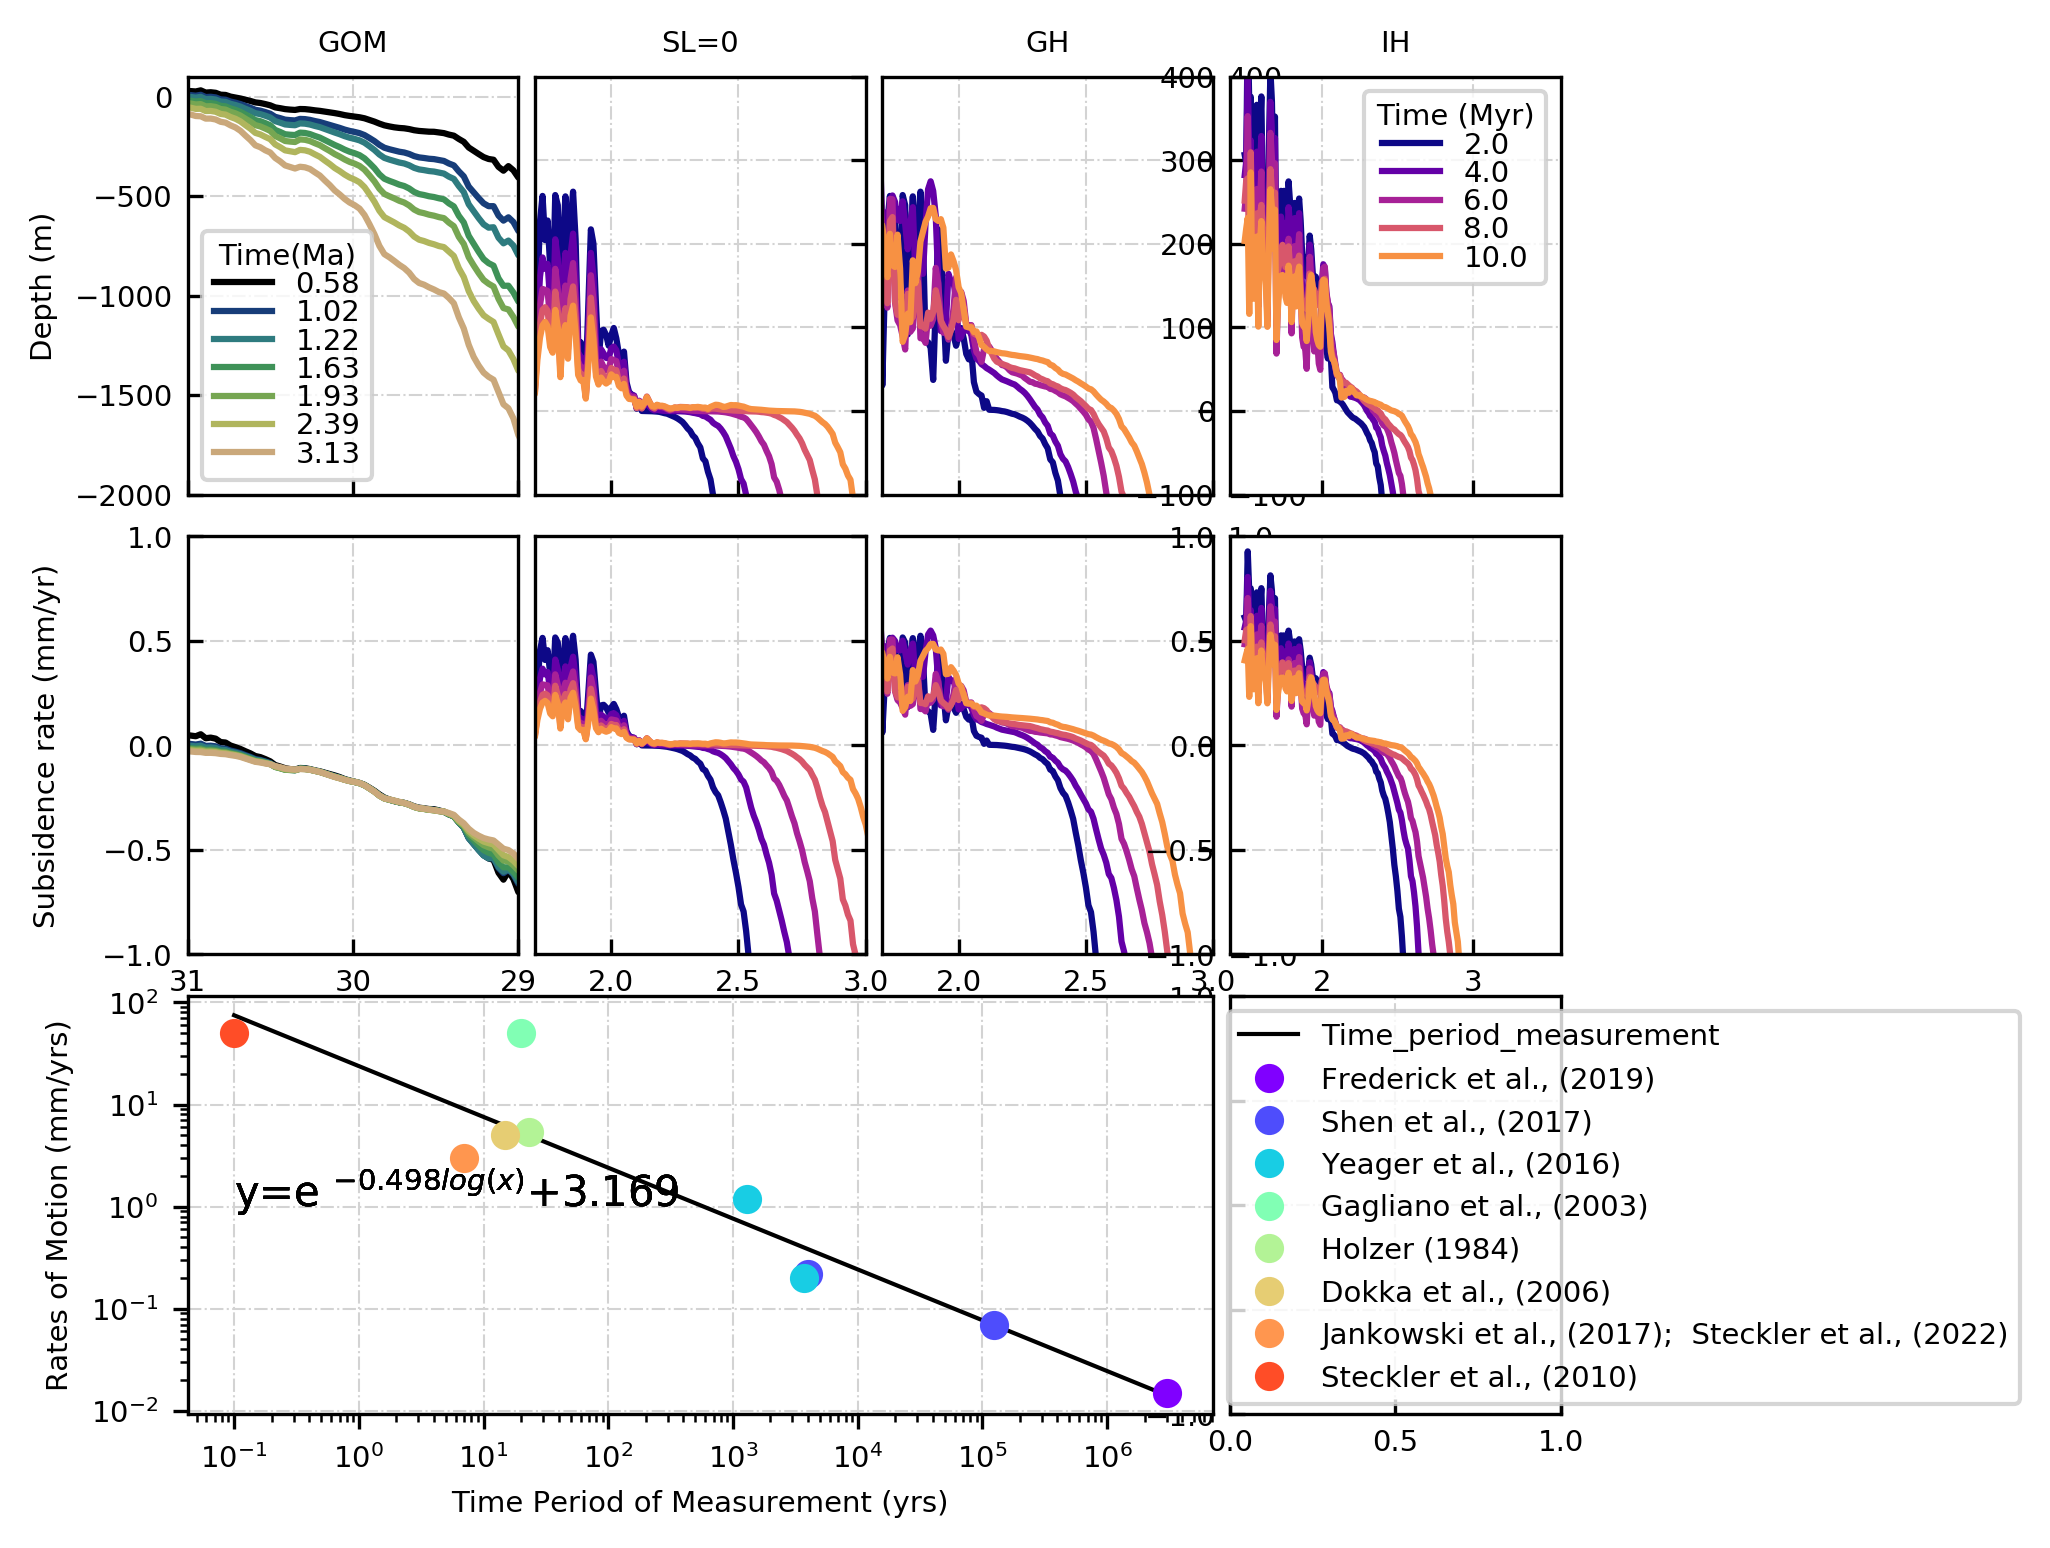

In [203]:
nrows=3; ncols=4
fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=((15/2.54), (15/2.54)), dpi=300)
plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42; plt.rc("font", size=7)

########
#Models#
########
# colormap = plt.cm.gist_earth_r
# color=[colormap(i) for i in np.linspace(0, 1, nfile-10)]
# c = np.linspace(0, 1, nfile-10)
# norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
# cmap = mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma_r)
# cmap.set_array([])
# color=[plt.cm.plasma_r(i) for i in np.linspace(0, 1.5, 12)]

colormap = plt.cm.plasma

color=[colormap(i) for i in np.linspace(0, 1, nfile-10)]

c = np.linspace(0, 1, nfile-10)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma)
cmap.set_array([])

column_title=['GOM', 'SL=0','GH', 'IH']

ub=150 #Upstream boundary
db=350 #Downstream boundary
xs_i=100#index at which the cross-section is plotted
initial_step=19
final_step=119

for i in np.arange(0,3,1):                 
    for step in np.arange(20,nfile,20):
        morpho = morph.morphoGrid(sim[i],dx=1e4)
        morpho.loadHDF5(timestep=step)
#         axes.flatten()[i].plot(morpho.x[xs_i,ub:db]/1e6, morpho.flexure[xs_i,ub:db], color=color[step-20])  
        axes.flatten()[i+1].plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db], color=color[step-20], label=step/10)  
        axes.flatten()[i+ncols+1].plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db]/500, color=color[step-20], label=final_step-step)        
axes.flatten()[3].legend(labelspacing = 0.01, title='Time (Myr)')  
#####
#GOM#
#####
color=[plt.cm.gist_earth(i) for i in np.linspace(0, 1.5, 12)]

for i in np.arange(0,len(seqs),1):
    axes.T.flatten()[0].plot(GOM.Lat, seqs[i], color=color[i], label= str(seq_duration[i]))

for i in np.arange(0,len(seqs),1):
    axes.T.flatten()[1].plot(GOM.Lat, seqs[i]/(seq_duration[i]*1e3), color=color[i], label= str(seq_duration[i]))
axes.T.flatten()[0].legend(labelspacing = 0.01, title='Time(Ma)' )      



axb=plt.subplot2grid((nrows,ncols),(nrows-1,0), colspan=3)

x=subsidence_rates.Time_period_measurement
y=subsidence_rates.rates_mm_yr
m, c = np.polyfit(np.log(x), np.log(y), deg=1)

y_fit= np.exp(m*np.log(x) + c) # calculate the fitted values of y 

axb.plot(x, y_fit, color='k', linewidth=1)

colormap = plt.cm.rainbow
color=[colormap(i) for i in np.linspace(0, 1, len(subsidence_rates.Study)+1)]

for i, item in enumerate(subsidence_rates.Study):
    if i==0:
        axb.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=color[i], label=subsidence_rates.Study[i])
    if i==1:
        axb.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=color[i], label=subsidence_rates.Study[i])
    if i==2:
        axb.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=color[1])
    if i==3:
        axb.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=color[i], label=subsidence_rates.Study[i])
    if i==4:
        axb.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=color[3])
    if i>=5:
        axb.loglog(subsidence_rates.Time_period_measurement[i], subsidence_rates.rates_mm_yr[i], 'o', color=color[i], label=subsidence_rates.Study[i])

        axb.text(0.1,1,'y=e $^{'+str(np.round(m,3)) +' log (x)}$+'+ str(np.round(c,3)), fontsize=10)
axb.set_xlabel('Time Period of Measurement (yrs)')
axb.set_ylabel('Rates of Motion (mm/yrs)')
axb.legend(bbox_to_anchor=[1,1], fontsize=7)

        
############
#Formatting# 
############
for i in np.arange(0,nrows*ncols,1):
    axes.T.flatten()[i].grid(color='lightgrey', linestyle='-.', linewidth=0.5)
    axes.T.flatten()[i].tick_params(direction= 'in')
    if i==0:
        axes.T.flatten()[i].set_ylabel('Depth (m)')
        axes.T.flatten()[i].set_xlim(31,29)
        axes.T.flatten()[i].set_ylim(-2e3,100)
    if i==1:
        axes.T.flatten()[i].set_xlabel('Latitude º')
        axes.T.flatten()[i].set_ylabel('Subsidence rate (mm/yr)', labelpad=10)
        axes.T.flatten()[i].set_xlim(31,29)
        axes.T.flatten()[i].set_ylim( -1,1)
    if i>=2 and i<=5:
         axes.T.flatten()[i].set_yticklabels([]) 
    if i>=5 and i<=7:
        axes.flatten()[i].set_xlabel('Distance x $10^3$ (km)')
    if i>=3 and i<=8:
        axes.T.flatten()[i].yaxis.tick_right()
        axes.T.flatten()[i].set_xlim(1.7,3)
    if i>=1 and i<=3:
        axes.flatten()[i].set_ylim(-100,400)
    # First row
    if i<ncols:
        axes.flatten()[i].set_title(column_title[i], fontsize=7)
        axes.flatten()[i].set_xticklabels([]) 
    #second row
    if i>ncols:
        axes.flatten()[i].set_ylim(1, -1)
        axes.flatten()[i].invert_yaxis()

axb.grid(color='lightgrey', linestyle='-.', linewidth=0.5)
fig.subplots_adjust(hspace=0.1, wspace=0.05)
# plt.tight_layout()




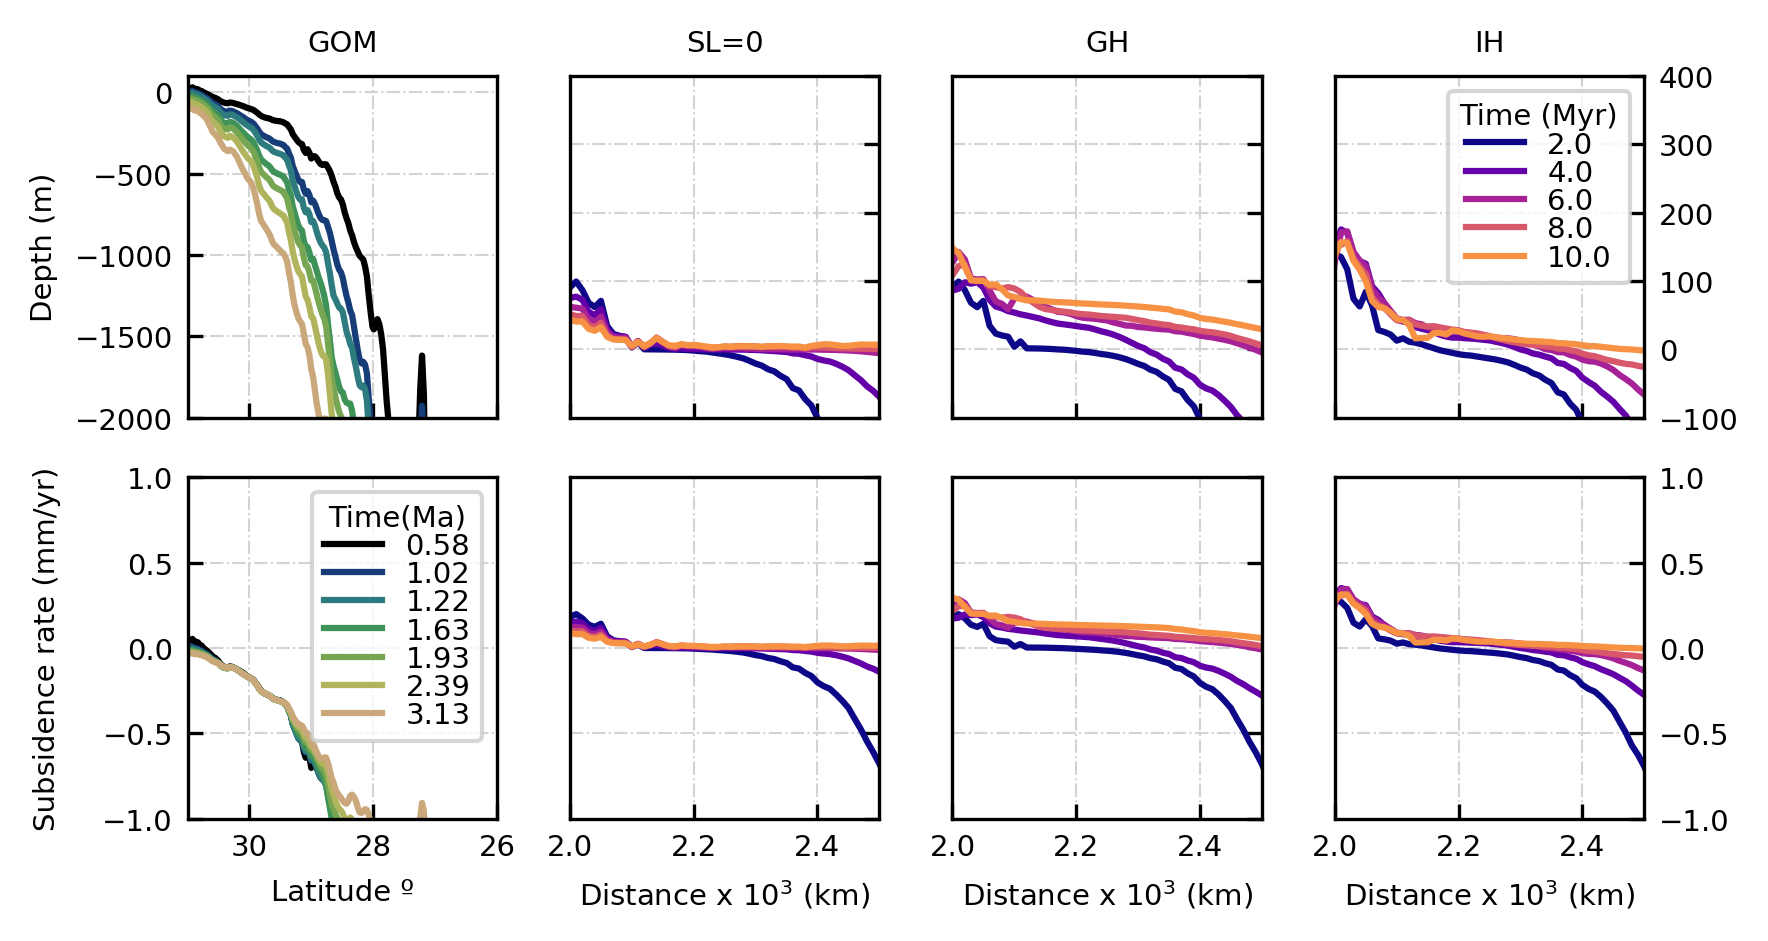

In [204]:

nrows=2; ncols=4
fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=((15/2.54), (8/2.54)), dpi=300)
plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42; plt.rc("font", size=7)

########
#Models#
########
# colormap = plt.cm.gist_earth_r
# color=[colormap(i) for i in np.linspace(0, 1, nfile-10)]
# c = np.linspace(0, 1, nfile-10)
# norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
# cmap = mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma_r)
# cmap.set_array([])
# color=[plt.cm.plasma_r(i) for i in np.linspace(0, 1.5, 12)]

colormap = plt.cm.plasma

color=[colormap(i) for i in np.linspace(0, 1, nfile-10)]

c = np.linspace(0, 1, nfile-10)
norm = mpl.colors.Normalize(vmin=c.min(), vmax=c.max())
cmap = mpl.cm.ScalarMappable(norm=norm, cmap=plt.cm.plasma)
cmap.set_array([])

column_title=['GOM', 'SL=0','GH', 'IH']

ub=150 #Upstream boundary
db=350 #Downstream boundary
xs_i=100#index at which the cross-section is plotted
initial_step=19
final_step=119

for i in np.arange(0,3,1):                 
    for step in np.arange(20,nfile,20):
        morpho = morph.morphoGrid(sim[i],dx=1e4)
        morpho.loadHDF5(timestep=step)
#         axes.flatten()[i].plot(morpho.x[xs_i,ub:db]/1e6, morpho.flexure[xs_i,ub:db], color=color[step-20])  
        axes.flatten()[i+1].plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db], color=color[step-20], label=step/10)  
        axes.flatten()[i+ncols+1].plot(morpho.x[xs_i,ub:db]/1e6, morpho.z[xs_i,ub:db]/500, color=color[step-20], label=final_step-step)        
axes.flatten()[3].legend(labelspacing = 0.01, title='Time (Myr)')  
#####
#GOM#
#####
color=[plt.cm.gist_earth(i) for i in np.linspace(0, 1.5, 12)]

for i in np.arange(0,len(seqs),1):
    axes.T.flatten()[0].plot(GOM.Lat, seqs[i], color=color[i], label= str(seq_duration[i]))

for i in np.arange(0,len(seqs),1):
    axes.T.flatten()[1].plot(GOM.Lat, seqs[i]/(seq_duration[i]*1e3), color=color[i], label= str(seq_duration[i]))
axes.T.flatten()[1].legend(labelspacing = 0.01, title='Time(Ma)' )      
        
        
############
#Formatting# 
############
for i in np.arange(0,nrows*ncols,1):
    axes.T.flatten()[i].grid(color='lightgrey', linestyle='-.', linewidth=0.5)
    axes.T.flatten()[i].tick_params(direction= 'in')
    if i==0:
        axes.T.flatten()[i].set_ylabel('Depth (m)')
        axes.T.flatten()[i].set_xlim(31,26)
        axes.T.flatten()[i].set_ylim(-2e3,100)
    if i==1:
        axes.T.flatten()[i].set_xlabel('Latitude º')
        axes.T.flatten()[i].set_ylabel('Subsidence rate (mm/yr)', labelpad=10)
        axes.T.flatten()[i].set_xlim(31,26)
        axes.T.flatten()[i].set_ylim( -1,1)
    if i>=2 and i<=5:
         axes.T.flatten()[i].set_yticklabels([]) 
    if i>=5 and i<=7:
        axes.flatten()[i].set_xlabel('Distance x $10^3$ (km)')
    if i>=2 and i<=7:
        axes.T.flatten()[i].yaxis.tick_right()
        axes.T.flatten()[i].set_xlim(2, 2.5)
    if i>=1 and i<=3:
        axes.flatten()[i].set_ylim(-100,400)
    # First row
    if i<ncols:
        axes.flatten()[i].set_title(column_title[i], fontsize=7)
        axes.flatten()[i].set_xticklabels([]) 
    #second row
    if i>ncols:
        axes.flatten()[i].set_ylim(1, -1)
        axes.flatten()[i].invert_yaxis()


fig.subplots_adjust(hspace=0.07, wspace=0.02)
plt.tight_layout()




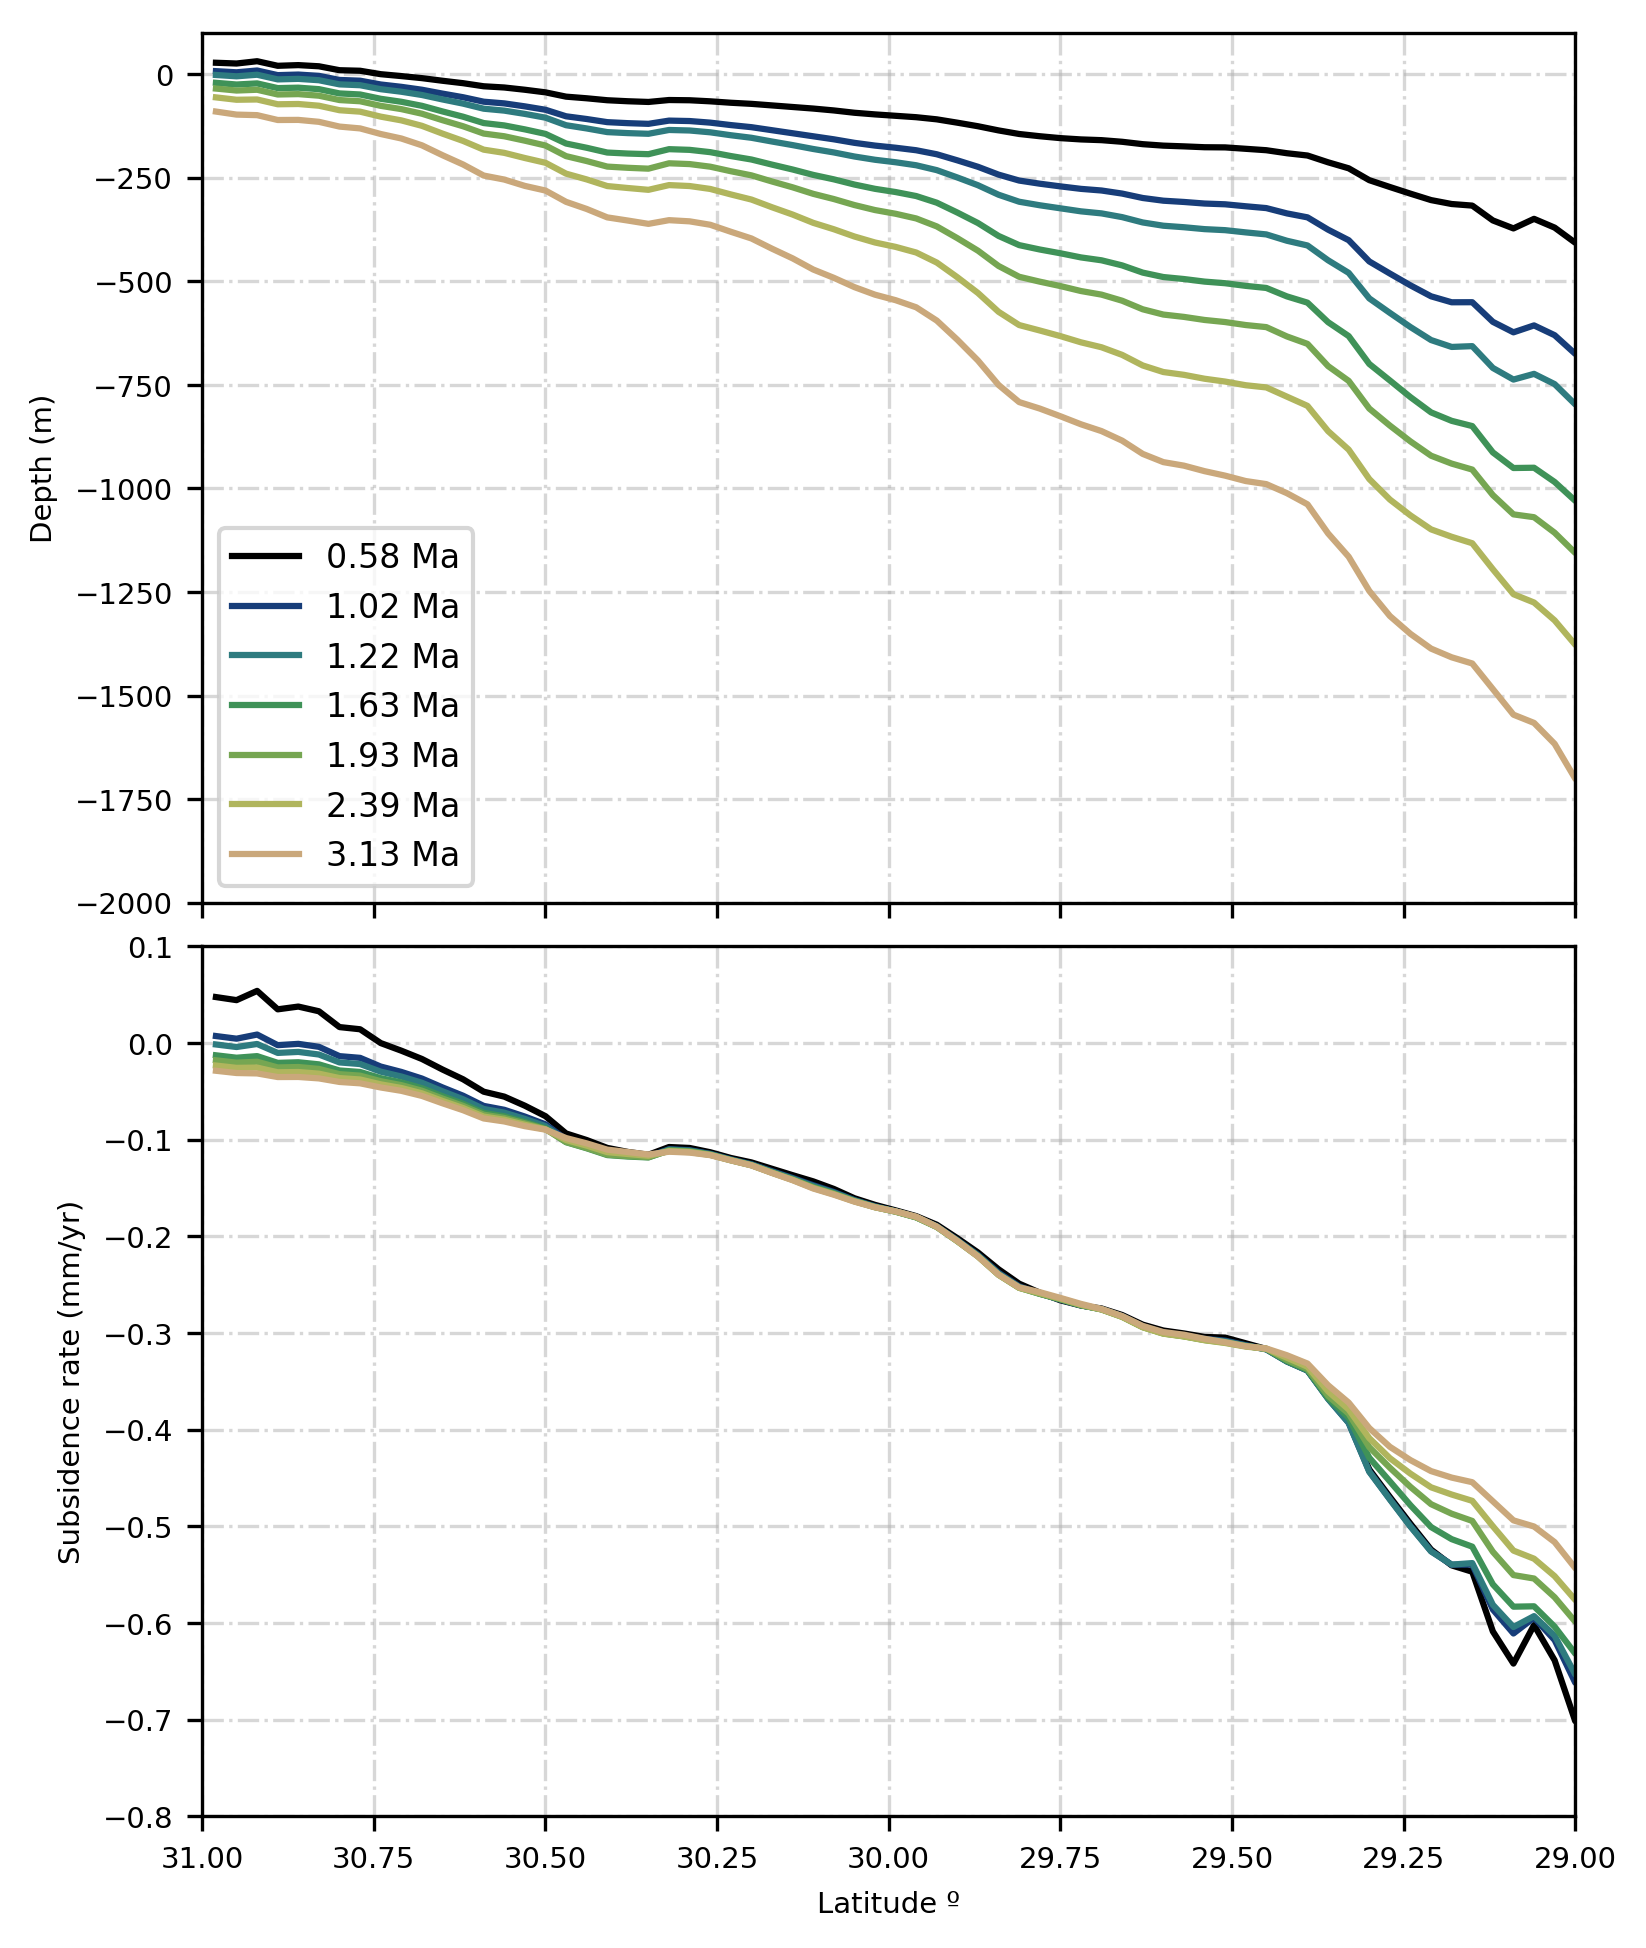

In [205]:
#This is a better way to show the data, where the two plots share the x axis


fig, axes = plt.subplots(nrows=2,ncols=1, sharex=True, figsize=((15/2.54), (20/2.54)), dpi=300)#, constrained_layout=True
plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42; plt.rc("font", size=8)

color=[plt.cm.gist_earth(i) for i in np.linspace(0, 1.5, 12)]


for i in np.arange(0,len(seqs),1):
    axes[0].plot(GOM.Lat, seqs[i], color=color[i], label= str(seq_duration[i])+ ' Ma')


for i in np.arange(0,len(seqs),1):
    axes[1].plot(GOM.Lat, seqs[i]/(seq_duration[i]*1e3), color=color[i], label= str(seq_duration[i])+ ' Ma')

axes[0].set_xlim(31,29)
axes[0].set_ylim(-2e3,100);axes[1].set_ylim( -0.8,0.1)

axes[1].set_xlabel('Latitude º')
axes[0].set_ylabel('Depth (m)'); axes[1].set_ylabel('Subsidence rate (mm/yr)')


axes[0].grid(linestyle= '-.', alpha=0.5);axes[1].grid(linestyle= '-.', alpha=0.5)


axes[0].legend()
fig.subplots_adjust(hspace=0.05)


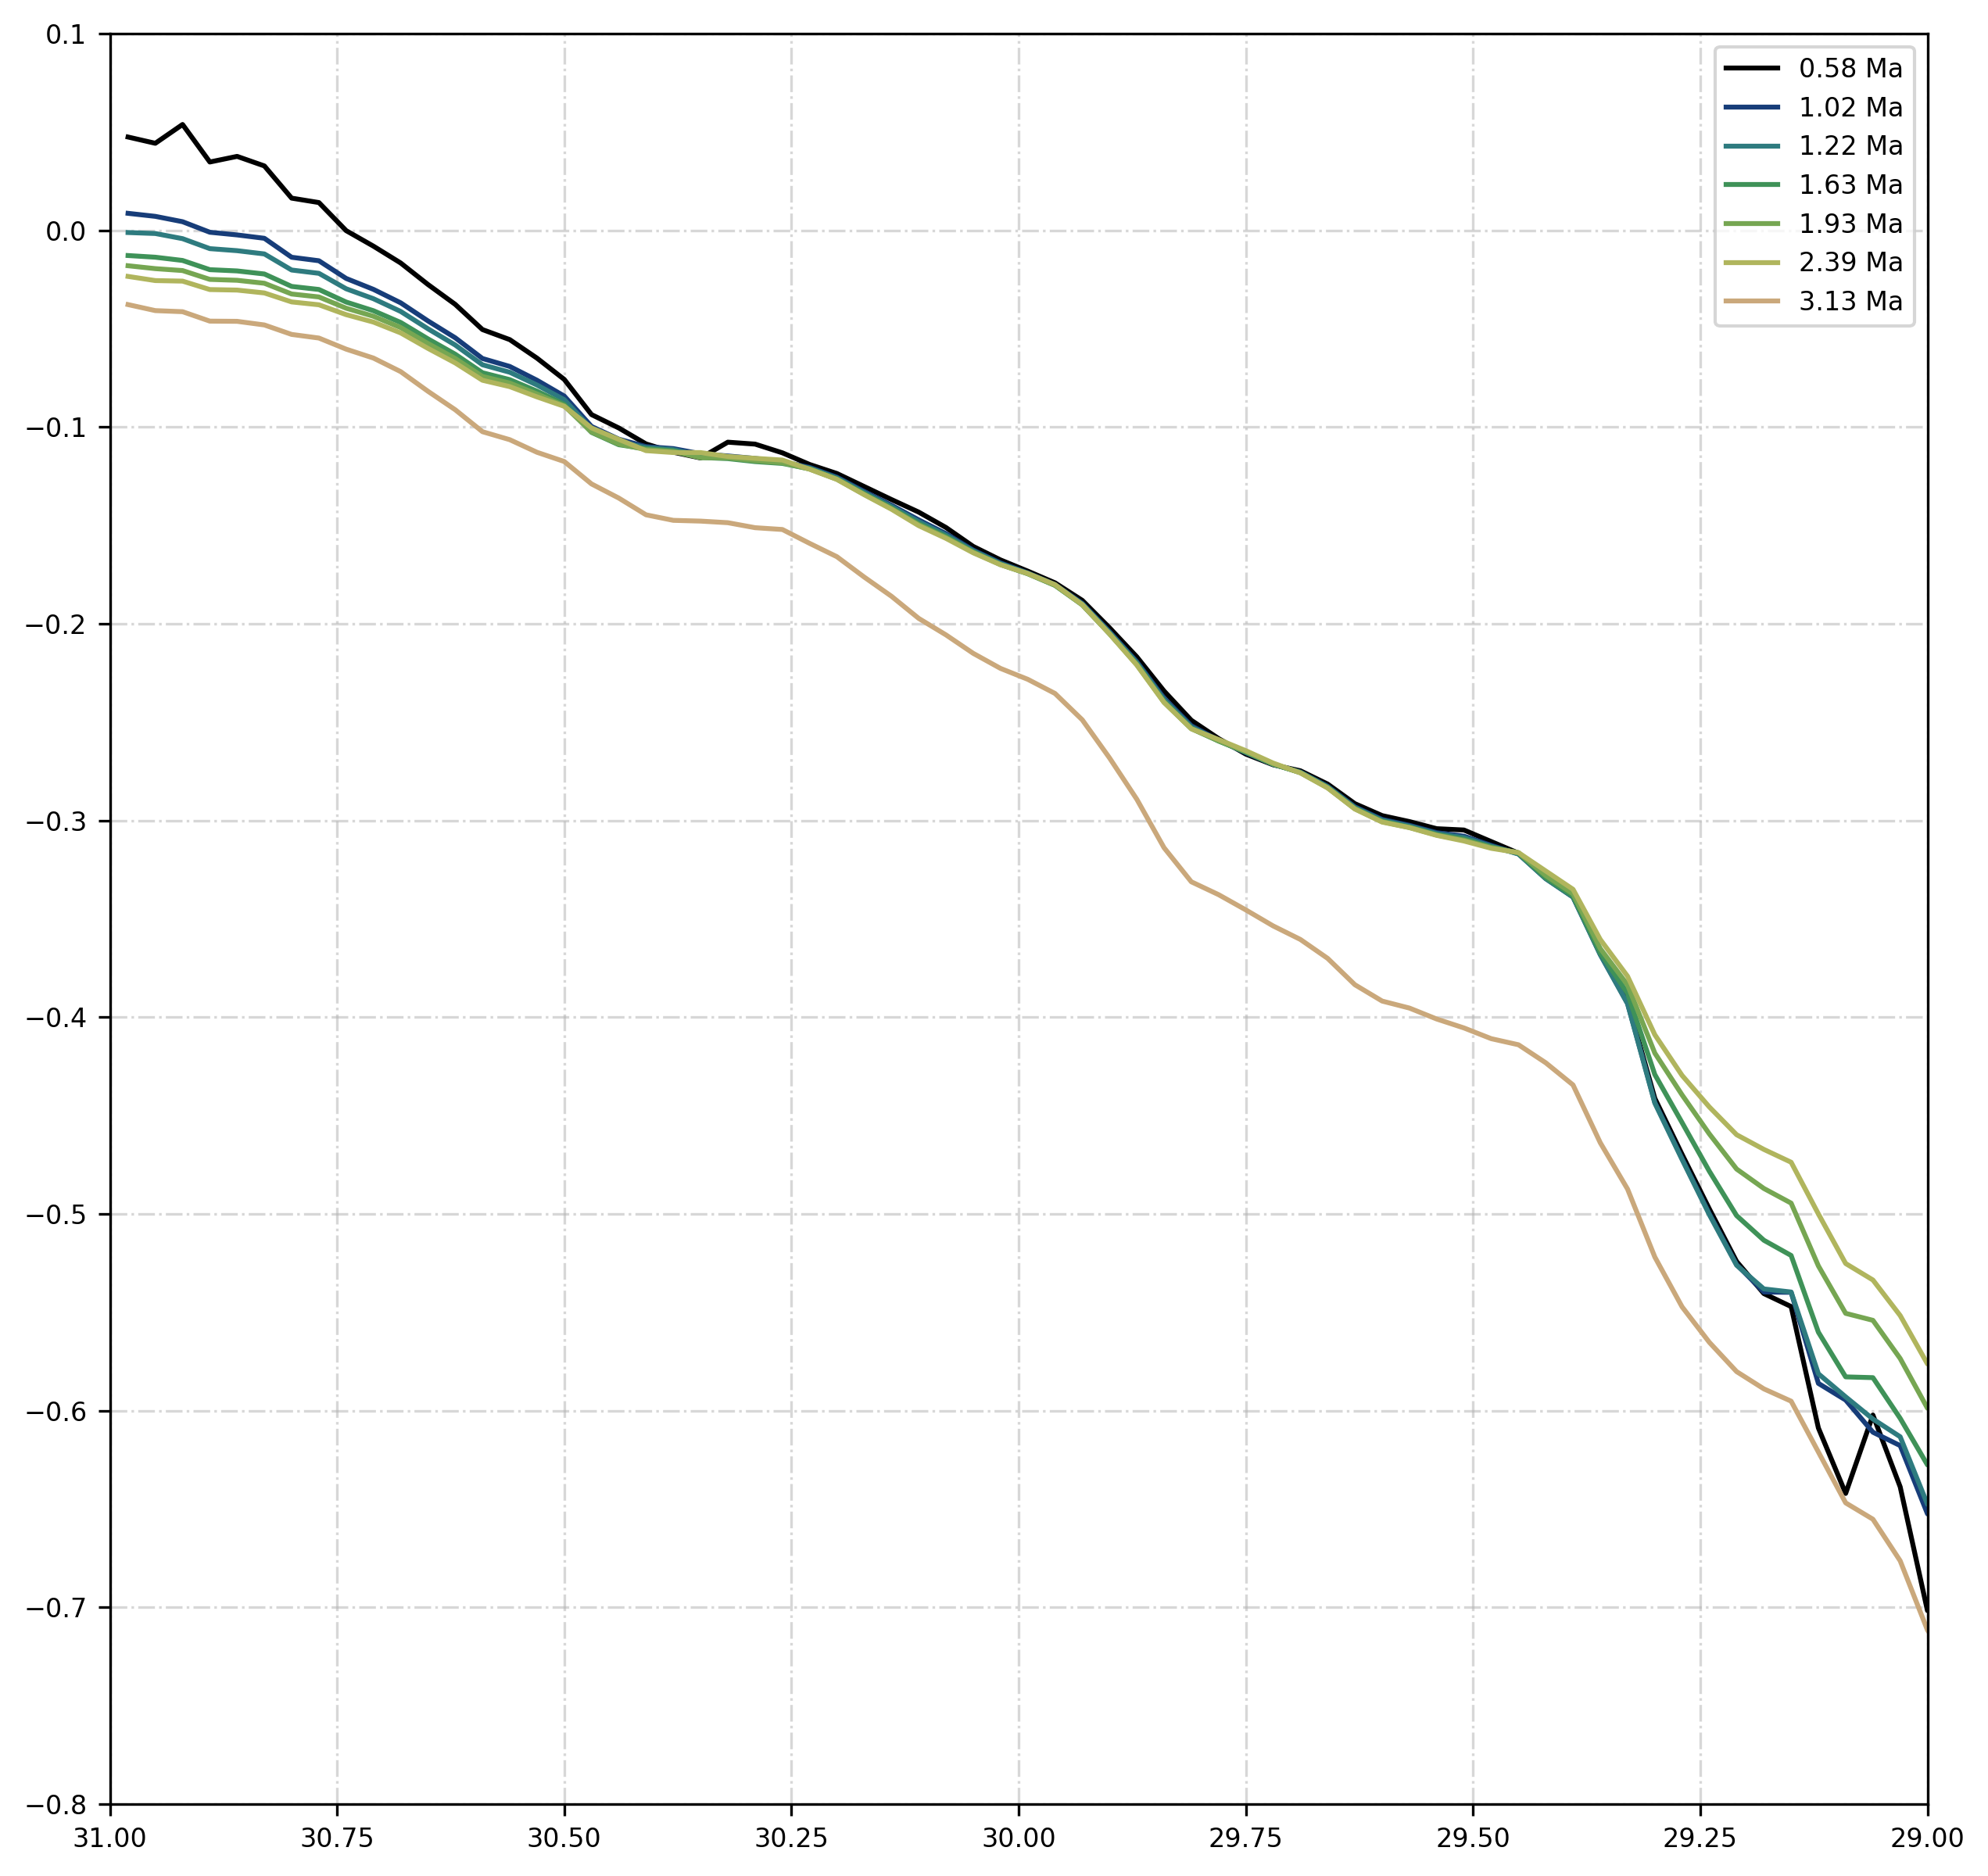

In [206]:
#something is wrong with the last rate, this is from Frederick's files

fig = plt.figure(figsize=(10,10), dpi=300)

for i in np.arange(0,len(seqs),1):
    plt.plot(GOM.Lat, seqs_rates[i], color=color[i], label= str(seq_duration[i])+ ' Ma')
plt.xlim(29,31)
plt.ylim( -0.8,0.1)
plt.xlim(31,29)


plt.grid(linestyle= '-.', alpha=0.5);axes[1].grid(linestyle= '-.', alpha=0.5)
plt.legend()


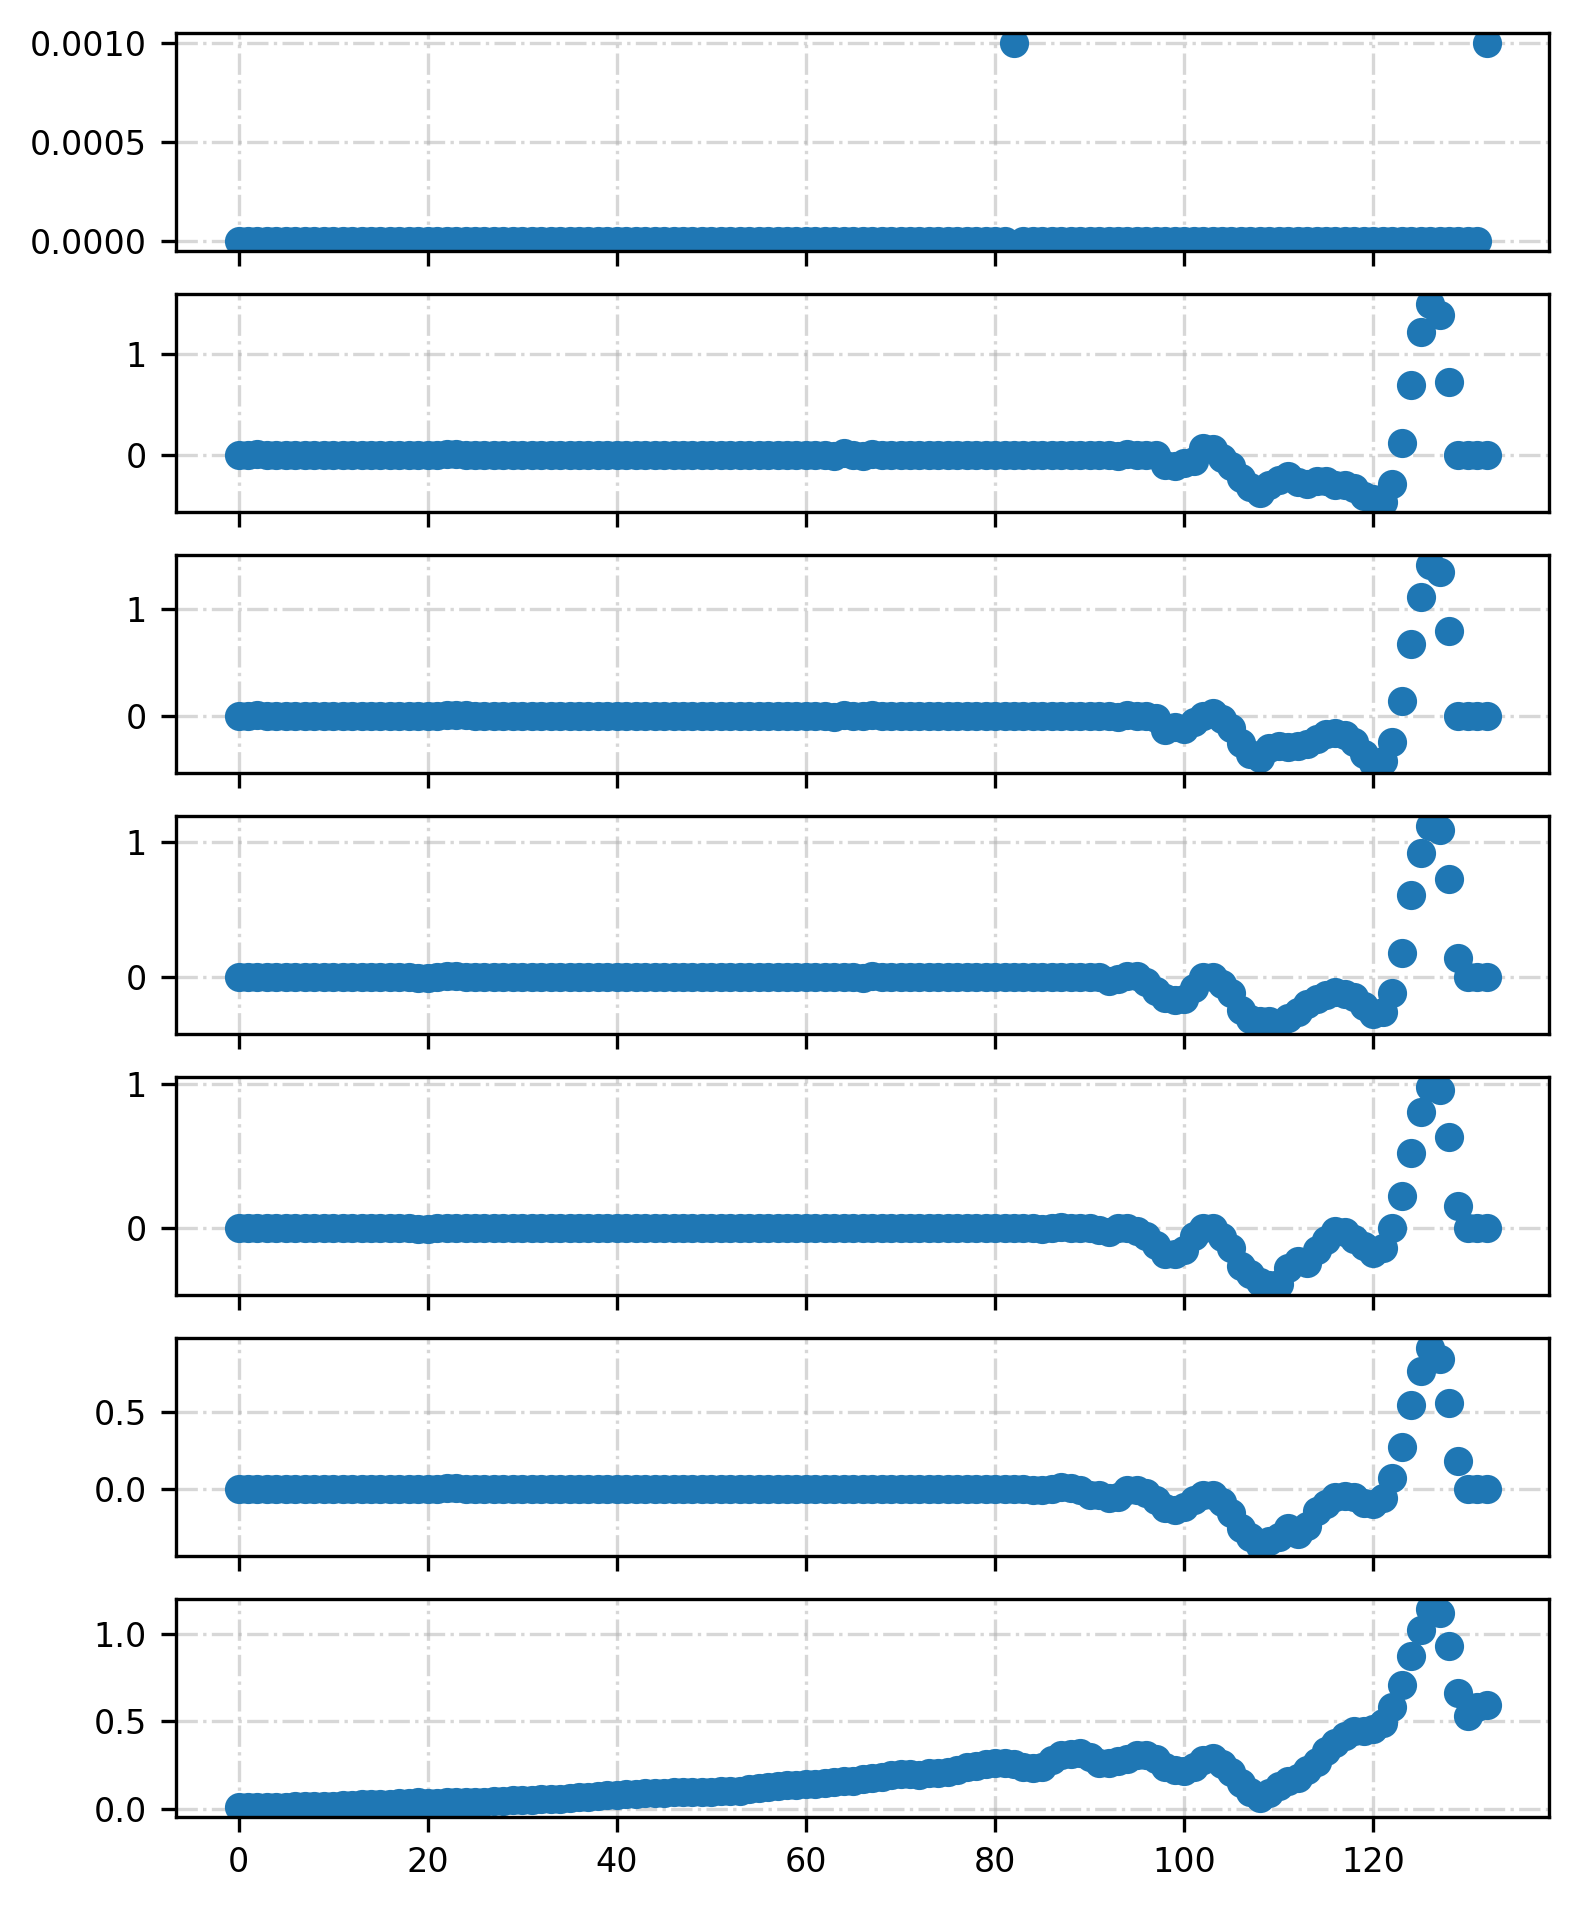

In [207]:
#Checking that my rate's calculation and Frederick's calculation match [diff=0]

fig, axes = plt.subplots(nrows=len(seqs),ncols=1, sharex=True, figsize=((15/2.54), (20/2.54)), dpi=300)#, constrained_layout=True
plt.rcParams['pdf.fonttype'] = 42; plt.rcParams['ps.fonttype'] = 42; plt.rc("font", size=8)

color=[plt.cm.rainbow(i) for i in np.linspace(0, 2, 12)]

for i in np.arange(0,len(seqs),1):    
    axes[i].plot(np.round(seqs[i]/(seq_duration[i]*1e3),3)- np.round(seqs_rates[i],3), 'o')
    axes[i].grid(linestyle= '-.', alpha=0.5);axes[1].grid(linestyle= '-.', alpha=0.5)

